<a href="https://colab.research.google.com/github/ranjan1311/hello-world/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import Libraries
import pandas as pd
import numpy as np # For Maths calculations
import seaborn as sns # For Data Visualization
import matplotlib.pyplot as plt # for plotting Graphs
%matplotlib inline
import warnings # to ignore nay warnings
warnings.filterwarnings ("ignore")

In [12]:
# Read the file
%pwd
#%cd sample_data/

train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

train_original = train.copy()
test_original = test.copy()

In [15]:
train.columns
test.columns
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
# Target Variable
train['Loan_Status'].value_counts()
# Normalize
train['Loan_Status'].value_counts(normalize=True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# UNIVARIATE ANALYSIS

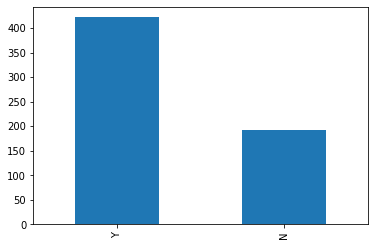

In [26]:
train['Loan_Status'].value_counts().plot.bar()


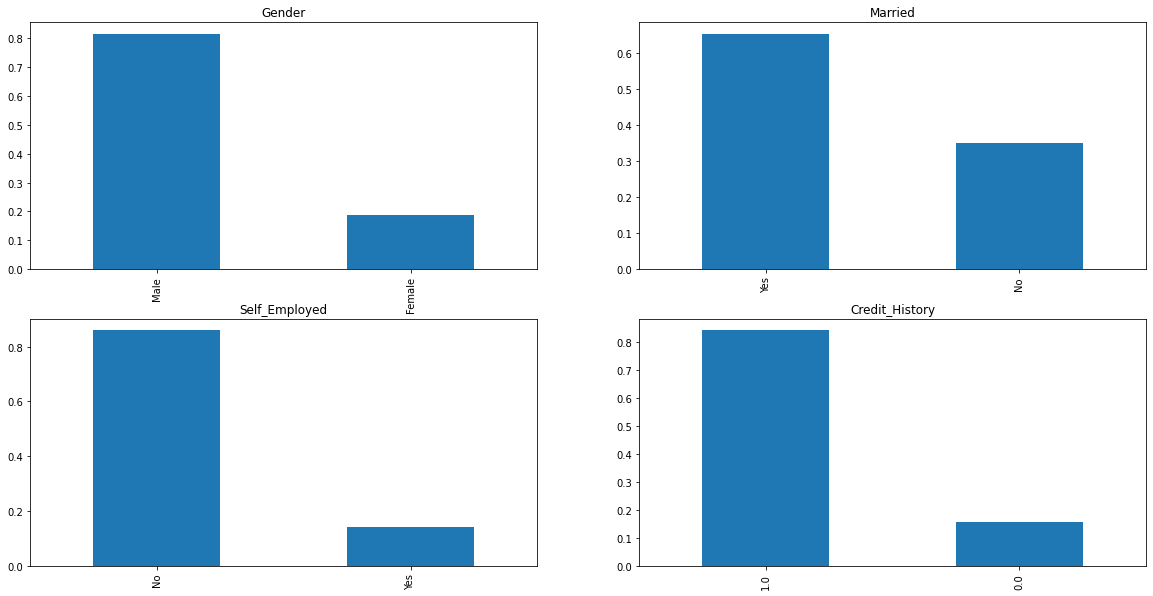

In [33]:
# Categorical Variables
#train.dtypes
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title="Married")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar( title="Self_Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit_History")

plt.show()

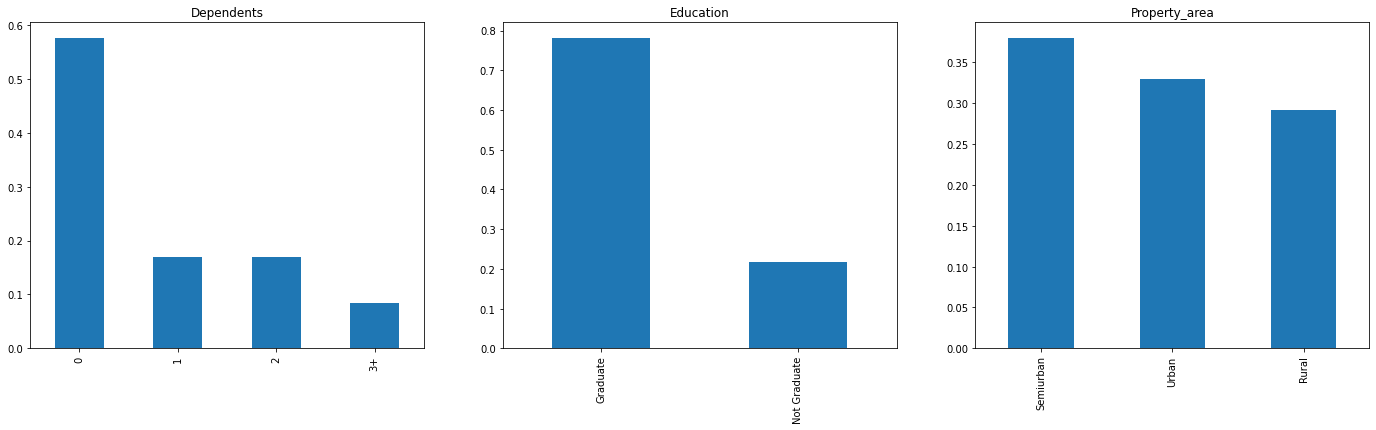

In [35]:
# Ordinal Variables
#train.dtypes
plt.figure(1) 
plt.subplot(131)

train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Dependents")
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar( title="Property_area")


plt.show()

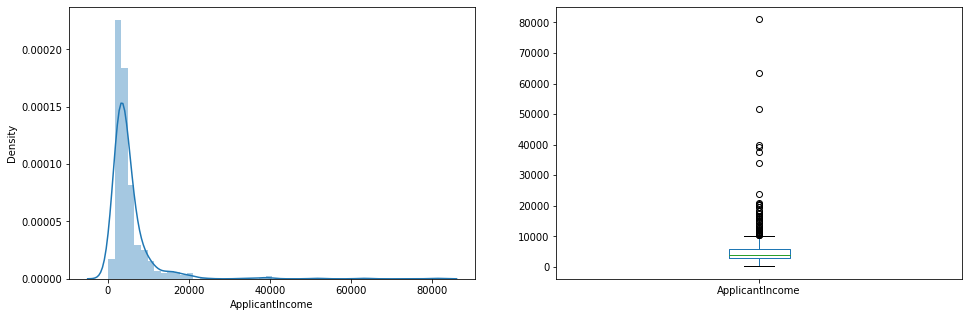

In [37]:
# Numerical Variables  -- applicants Distribution
#train.dtypes
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

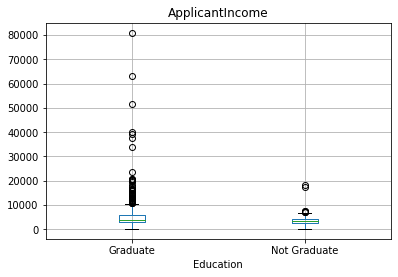

In [43]:
train.boxplot(column='ApplicantIncome',by='Education') 
plt.suptitle("")

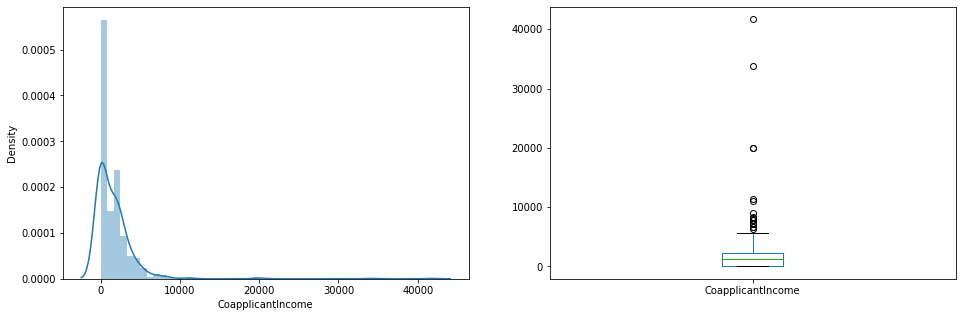

In [44]:
# Numerical Variables - Coapplicant Distribution
#train.dtypes
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

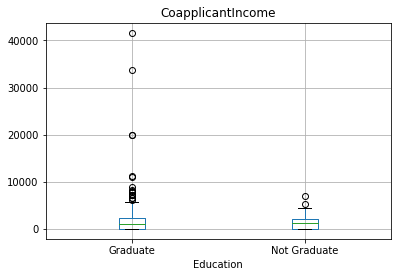

In [45]:
train.boxplot(column='CoapplicantIncome',by='Education') 
plt.suptitle("")

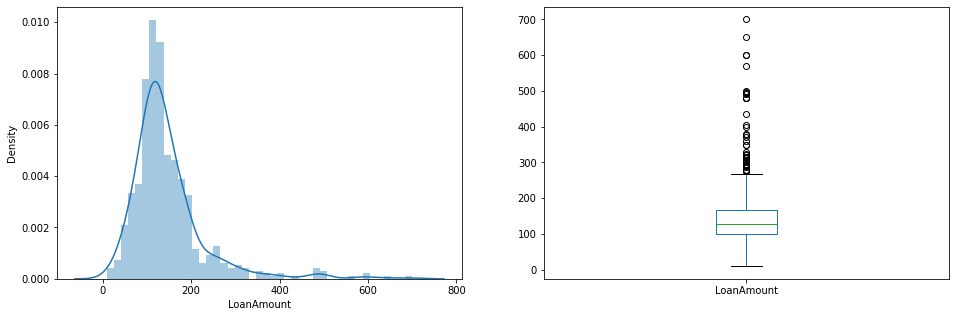

In [68]:
# Numerical Variables  -- LoanAmount Distribution
#train.dtypes
train.dropna()
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

# BIVARIATE ANALYSIS

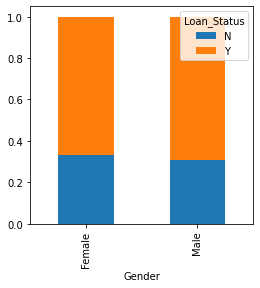

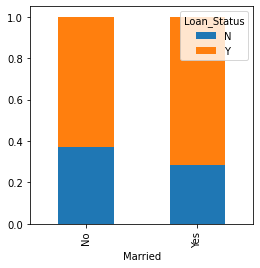

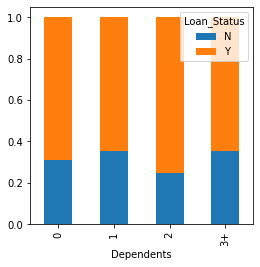

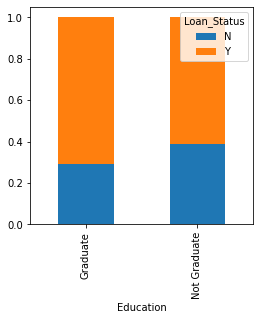

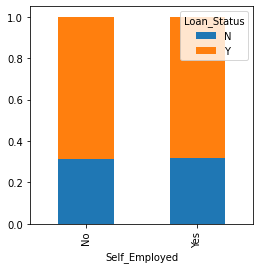

In [53]:
# Categorical Independent Variable with Target Variable

Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()



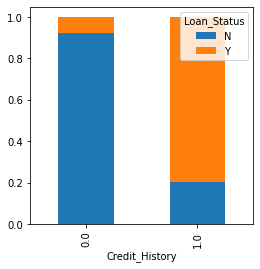

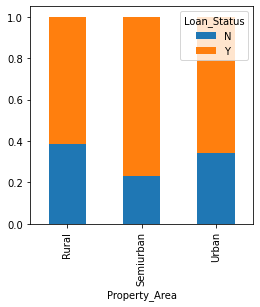

In [54]:
# Categorical Independent Variable with Target Variable

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()


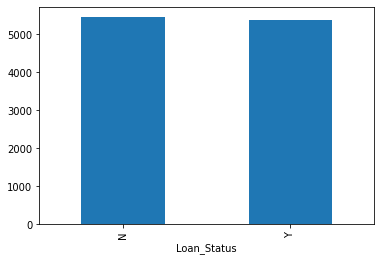

In [55]:
# Numerical Independent Variable with Target Variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


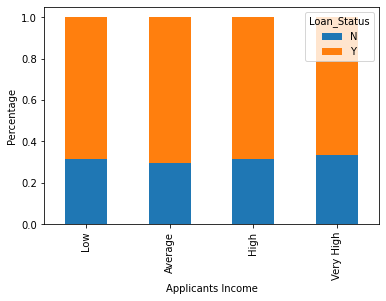

In [57]:
# Lets make Bins for Applicats Income

bins=[0,2500, 4000, 6000, 81000] 
group= ['Low','Average', 'High', 'Very High']
train['Income_Bin'] = pd.cut(train['ApplicantIncome'],bins,labels = group)

Income_Bin = pd.crosstab(train['Income_Bin'],train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Applicants Income')
P=plt.ylabel('Percentage')

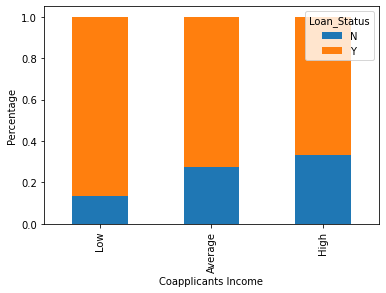

In [59]:
# Lets make Bins for COAPPLICATS Income

bins=[0,1000, 3000, 42000] 
group= ['Low','Average', 'High']
train['coapplicant_Income_Bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)

coapplicant_Income_Bin = pd.crosstab(train['coapplicant_Income_Bin'],train['Loan_Status'])
coapplicant_Income_Bin.div(coapplicant_Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Coapplicants Income')
P=plt.ylabel('Percentage')

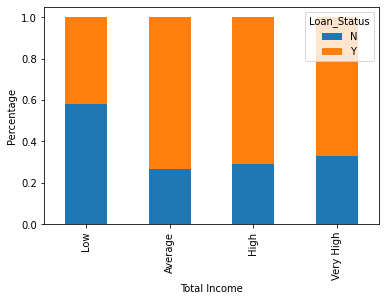

In [60]:
# Lets make Bins for total Income for bnoth Applicants and COAPPLICATS Income

train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500, 4000, 6000, 81000] 
group= ['Low','Average', 'High','Very High']

train['Total_Income_Bin'] = pd.cut(train['Total_Income'],bins,labels = group)

Total_Income_Bin = pd.crosstab(train['Total_Income_Bin'],train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total Income')
P=plt.ylabel('Percentage')

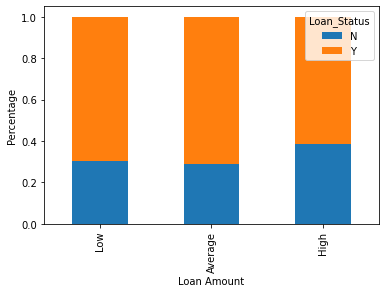

In [61]:
# Lets Analyze Loam Amount variable 

bins=[0,100, 200, 700] 
group= ['Low','Average', 'High']

train['LoanAmount_Bin'] = pd.cut(train['LoanAmount'],bins,labels = group)

LoanAmount_Bin = pd.crosstab(train['LoanAmount_Bin'],train['Loan_Status'])
LoanAmount_Bin.div(LoanAmount_Bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Loan Amount')
P=plt.ylabel('Percentage')

In [ ]:
### Dependents and Loan Status
## Drop all Bins
## replace 3+ with 3 for Dependents for Correlation check with Loan Status for all numerical variables

train =train.drop(['Income_Bin','coapplicant_Income_Bin','LoanAmount_Bin', 'Total_Income_Bin','Total_Income'], axis=1)


In [70]:

train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


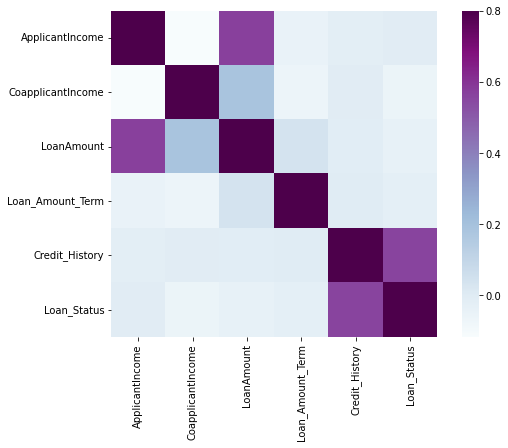

In [71]:
# Corelation Matrix

matrix= train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True,cmap="BuPu")


# Missing Values and Outlier Treatment 

In [89]:
# Imputing the missing values

train.isnull().sum()
# Numericals inpute using Mean or Median
# Categorical = using Mode

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
train.isnull().sum()


In [91]:
# Imputing the missing values in TEST Dataset

train.isnull().sum()
# Numericals inpute using Mean or Median
# Categorical = using Mode

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)


test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
test.isnull().sum()

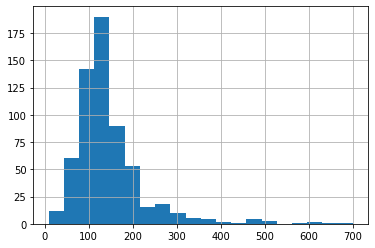

In [94]:
# Outlier Treatment with Log Transformation
train['LoanAmount'].hist(bins=20)


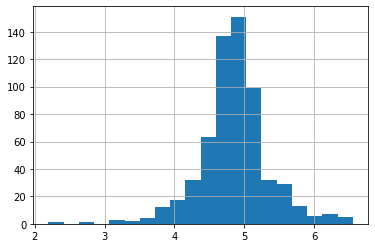

In [96]:
# Outlier Treatment with Log Transformation
train['LoanAmount_Log'] = np.log(train['LoanAmount'])
train['LoanAmount_Log'].hist(bins=20)


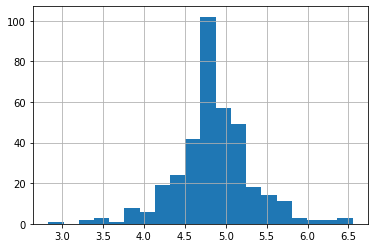

In [98]:

test['LoanAmount_Log'] = np.log(train['LoanAmount'])
test['LoanAmount_Log'].hist(bins=20)